# Analysis Submission
### Riley, Savreen & Motheo
---
### Research Questions:

#### 1. Which neighbouhood in San Francisco should I choose for a high quality rental experience at a low price?

#### 2. Does being instanly bookable affect the availability of a listing?

## Research Question 1:
### Which neighbouhood in San Francisco should I choose for a high quality rental experience at a low price?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from functions import *

df = process_data_1("./../../data/raw/listings.csv")

/Users/rileybolen/Documents/COSC301/course-project-group_1048/analysis/submitted/functions.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  features_1['price'] = features_1['price'].str.replace('$', '').str.replace(',', '').astype('float64')
/Users/rileybolen/Documents/COSC301/course-project-group_1048/analysis/submitted/functions.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_1['price'] = features_1['price'].str.replace('$', '').str.replace(',', '').astype('float64')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Downtown/Civic Center'),
  Text(1, 0, 'Mission'),
  Text(2, 0, 'Western Addition'),
  Text(3, 0, 'South of Market'),
  Text(4, 0, 'Castro/Upper Market'),
  Text(5, 0, 'Bernal Heights'),
  Text(6, 0, 'Haight Ashbury'),
  Text(7, 0, 'Noe Valley'),
  Text(8, 0, 'Outer Sunset'),
  Text(9, 0, 'Nob Hill')])

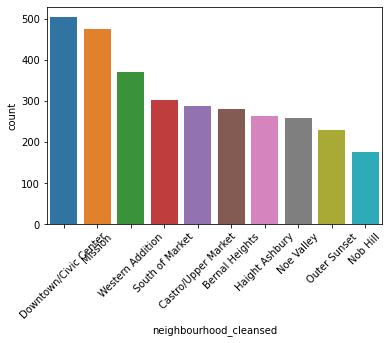

In [2]:
# First, because I know that I want a high rating and low price, I will plot the counts again with the lowest ratings and highest prices filtered out.
# EDIT: After doing this filtering I realized that it significantly changed the most popular neighbourhoods, so I decided not to do it,
# in order to preserve the validity of the data.
# I will leave the dataset as is, and just take the top 10 most common neighbourhoods.
sns.countplot(x="neighbourhood_cleansed", data=df, order=df['neighbourhood_cleansed'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)

In [3]:
# Based on these results, I will filter my dataset to only include these 10 neighbourhoods
df_reduced = popular_locations(df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Addition'),
  Text(1, 0, 'Bernal Heights'),
  Text(2, 0, 'Haight Ashbury'),
  Text(3, 0, 'Mission'),
  Text(4, 0, 'Nob Hill'),
  Text(5, 0, 'Downtown/Civic Center'),
  Text(6, 0, 'Castro/Upper Market'),
  Text(7, 0, 'Noe Valley'),
  Text(8, 0, 'South of Market'),
  Text(9, 0, 'Outer Sunset')])

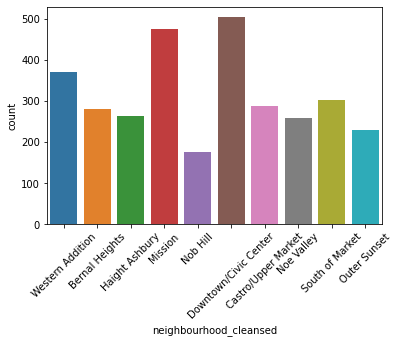

In [4]:
# I will use a coutplot again to confirm that the new data looks okay.
sns.countplot(x="neighbourhood_cleansed", data=df_reduced)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Addition'),
  Text(1, 0, 'Bernal Heights'),
  Text(2, 0, 'Haight Ashbury'),
  Text(3, 0, 'Mission'),
  Text(4, 0, 'Nob Hill'),
  Text(5, 0, 'Downtown/Civic Center'),
  Text(6, 0, 'Castro/Upper Market'),
  Text(7, 0, 'Noe Valley'),
  Text(8, 0, 'South of Market'),
  Text(9, 0, 'Outer Sunset')])

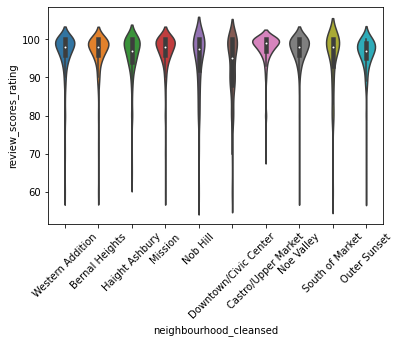

In [5]:
# Here, I will remove the outliers to give a more focused look at the bulk of the data, but I would like to note 
# that there are some listings which cause the data in most of the neighbourhoods to spike down around 20

sns.violinplot(x="neighbourhood_cleansed", y="review_scores_rating", data=df_reduced[df_reduced['review_scores_rating'] >= 60])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Addition'),
  Text(1, 0, 'Bernal Heights'),
  Text(2, 0, 'Haight Ashbury'),
  Text(3, 0, 'Mission'),
  Text(4, 0, 'Nob Hill'),
  Text(5, 0, 'Downtown/Civic Center'),
  Text(6, 0, 'Castro/Upper Market'),
  Text(7, 0, 'Noe Valley'),
  Text(8, 0, 'South of Market'),
  Text(9, 0, 'Outer Sunset')])

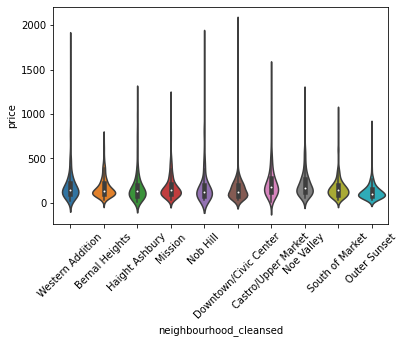

In [6]:
# I would also like to take a look at the relationship between price and neighbourhood. 
# Here, I will remove the outliers to give a more focused look at the bulk of the data, but I would like to note 
# that there are some listings which cause the data in a few neighbourhoods to spike up near $10,000

sns.violinplot(x="neighbourhood_cleansed", y="price", data=df_reduced[df_reduced['price'] <= 2500])
plt.xticks(rotation=45)

From these 2 plots comparing the relationships between rating & neighbourhood, and price & neighbourhood, As well as what I saw in my EDA, it looks like the average rental experience on Airbnb is relativly affordable, and meets the expactations of the customer. I the violin plots, you can see that many of the plots spike downwards for rating, and upwards for price, indicating that there are some negative experiences, and some expensive listings, but the majority of the data tends to be quite similar from neighbourhood to neighbourhood.

There is something that I feel is worth noting from these charts; The short and fat shapes of "Castro / Upper Market" in rating vs neighbourhood, and of "Bernal Heights" and "Outer Sunset" in price vs neighbourhood. This indicated that these variables are more consistent across listings in these neighbourhoods, because the data tends to clump towards similar values. This is good from our perspective as customers because there is a higher probability that we will get what we are looking for.

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

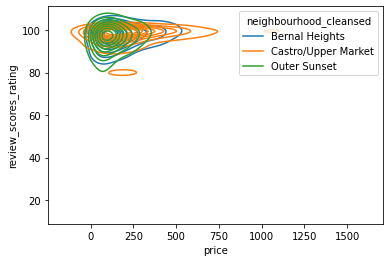

In [7]:
# Based on these violin charts, I will look more closely at the 3 neighbourhoods which stand out to me 
# as having consistently good ratings and low prices. Now that I have identified the neighborhoods which appear
# to be most consistent, I will compare the neighborhoods more closely to try to find the best balance betweeen 
# price and rating.

df_reduced = chosen_locations(df)

sns.kdeplot(
    data=df_reduced,
    x="price",
    y="review_scores_rating",
    hue="neighbourhood_cleansed",
    thresh=.1
)


## Conclusion

Based on the data, I have concluded that Bernal Heights, Castro/Upper Market and Outer Sunset would all offer a good balance of low price and high customer satisfaction on a consistent basis. My personal choice would be Castro / Upper Market because in the final KDE plot, it lies more flatly, at the top of the ratings axis showing consistently high ratings, and while it stretches farther up the price axis, the bulk of the data is at the cheaper end so it is still afforbable, but also has listings at higher price-points if you want to treat yourself a bit.

## Research Question 2
### Does being instanly bookable affect the availability of a listing?

In [2]:
df2 = process_data_2("./../../data/raw/listings.csv")

In [3]:
df2

availability_30  availability_60  availability_90 instant_bookable
0                   8               30               41                f
1                  30               60               90                f
2                  30               60               90                f
3                  30               60               90                f
4                  30               60               90                f
...               ...              ...              ...              ...
7082                0               20               50                f
7083                0                0               27                f
7084                9               39               69                t
7085               30               60               90                t
7086                0                0                0                f

[7087 rows x 4 columns]

<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

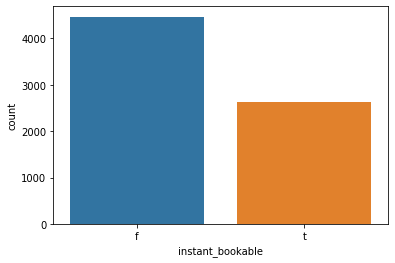

In [4]:
# First off, lets see the proportion of listings which can be booked instantly
sns.countplot(x="instant_bookable", data=df2)

Next, lets see the distribution of the different availability columns:

<AxesSubplot:xlabel='variable', ylabel='value'>

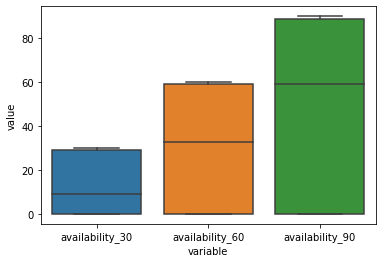

In [4]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2[['availability_30', 'availability_60', 'availability_90']]))

Looks like the data is nicely distributed, so there may be some interesting relationships here.
Finally, in order to address the research question, lets look to see if there is a difference in 
availability between the listings which are and are not instantly bookable

<ipython-input-6-05426a4f81ae>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


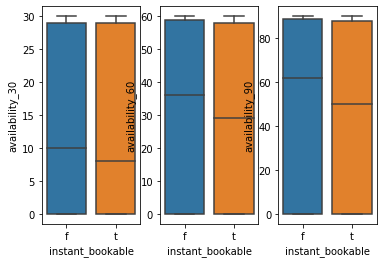

In [6]:
fig, ax =plt.subplots(1,3)
sns.boxplot(x="instant_bookable", y="availability_30", data=df2, ax=ax[0])
sns.boxplot(x="instant_bookable", y="availability_60", data=df2, ax=ax[1])
sns.boxplot(x="instant_bookable", y="availability_90", data=df2, ax=ax[2])
fig.show()


It looks like the mean values of the amount of available days in the 30, 60 and 90 day periods is consistently lower in the listings which are instantly bookable.

## Conclusion

Based on our analysis, there is a difference in the availability of a listing based on whether or not the property can be booked instantly or not. This implies that there is incentive for the owner of the property to allow their property to be booked instantly, because they could have their property booked more often, and further in advance!